# Imports

In [1]:
import numpy as np
import os
import sys
import pickle
import scipy

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)
import atlasMapping
import fixedDensity as fd

# Set Directory Paths

In [3]:
# Directory path to load preconstructed Atlas Data
%store -r baseDir
# Directory path to load formatted Thickness Data
%store -r thick_dataDir
# Directory path to save Calcualted Analysis Data
%store -r thick_CalData
# Directory path to save Figures
%store -r thick_Fig

# Loading

## Loading the preconstructed atlas data

In [4]:
# loads the preconstructed Atlas data
NetworkDataGeneral = scipy.io.loadmat(os.path.join(baseDir, 'NetworkAnalysisGeneral', 'FTDGeneralData_20221114.mat'))

## Thickness Data (from selected network), HC, TAU, and TDP 

In [5]:
# thickHC
with open(os.path.join(thick_CalData, 'thickHC.pkl'), 'rb') as f:
    thickHC = pickle.load(f)
f.close()

# thickTAU
with open(os.path.join(thick_CalData, 'thickTAU.pkl'), 'rb') as f:
    thickTAU = pickle.load(f)
f.close()

# thickTDP
with open(os.path.join(thick_CalData, 'thickTDP.pkl'), 'rb') as f:
    thickTDP = pickle.load(f)
f.close()

## W Score of Thickness Data (from selected network), HC, TAU, and TDP

In [6]:
# HC_w
with open(os.path.join(thick_CalData, 'HC_w.pkl'), 'rb') as f:
    HC_w = pickle.load(f)
f.close()

# TAU_w
with open(os.path.join(thick_CalData, 'TAU_w.pkl'), 'rb') as f:
    TAU_w = pickle.load(f)
f.close()

# TDP_w
with open(os.path.join(thick_CalData, 'TDP_w.pkl'), 'rb') as f:
    TDP_w = pickle.load(f)
f.close()

## Thickness Covariance Matrices - Dictionaries (Original, Z, W Score)

In [7]:
# cov_thick_dict
with open(os.path.join(thick_CalData, 'cov_thick_dict.pkl'), 'rb') as f:
    cov_thick_dict = pickle.load(f)
f.close()

# cov_thick_z_dict
with open(os.path.join(thick_CalData, 'cov_thick_z_dict.pkl'), 'rb') as f:
    cov_thick_z_dict = pickle.load(f)
f.close()

# cov_thick_w_dict
with open(os.path.join(thick_CalData, 'cov_thick_w_dict.pkl'), 'rb') as f:
    cov_thick_w_dict = pickle.load(f)
f.close()

## Volume Covariance Matrices - Dictionaries (Original, Z, W Score)

In [8]:
# cov_vol_dict
with open(os.path.join(thick_CalData, 'cov_vol_dict.pkl'), 'rb') as f:
    cov_vol_dict = pickle.load(f)
f.close()

# cov_vol_z_dict
with open(os.path.join(thick_CalData, 'cov_vol_z_dict.pkl'), 'rb') as f:
    cov_vol_z_dict = pickle.load(f)
f.close()

# cov_vol_w_dict
with open(os.path.join(thick_CalData, 'cov_vol_w_dict.pkl'), 'rb') as f:
    cov_vol_w_dict = pickle.load(f)
f.close()

## Center of Mass for the Selected Network

In [9]:
# currCoM
with open(os.path.join(thick_CalData, 'currCoM.pkl'), 'rb') as f:
    currCoM = pickle.load(f)
f.close()

## Atlas Region Names

In [10]:
# regNames
with open(os.path.join(thick_CalData, 'regNames.pkl'), 'rb') as f:
    regNames = pickle.load(f)
f.close()

# Draw 3D Atlas Map

## Define Variables

### Set fixed density value 

In [11]:
fd_val = 40 # Get top 100

## Thickness Value - Original

### Define Vectors for Node Size and Node Color

In [12]:
# FOR NODE SIZE (Original Thickness Value)
thick_HC_exp = thickHC
thick_TAU_exp = thickTAU
thick_TDP_exp = thickTDP

# Get the MAX/MIN Thickness values
minThick_HC = np.nanmin(np.nanmean(thick_HC_exp, axis=0))
minThick_TAU = np.nanmin(np.nanmean(thick_TAU_exp, axis=0))
minThick_TDP = np.nanmin(np.nanmean(thick_TDP_exp, axis=0))

vanishing_val = 0.2
maxThick_HC = np.nanmax(np.nanmean(thick_HC_exp, axis=0) - minThick_HC) + vanishing_val
maxThick_TAU = np.nanmax(np.nanmean(thick_TAU_exp, axis=0) - minThick_TAU) + vanishing_val
maxThick_TDP = np.nanmax(np.nanmean(thick_TDP_exp, axis=0) - minThick_TDP) + vanishing_val

# NODE Size
markerVecHC = np.nanmean(thick_HC_exp, axis=0)
markerVecHC = 3 * (1 - ((markerVecHC - minThick_HC) / maxThick_HC))

markerVecTAU = np.nanmean(thick_TAU_exp, axis=0)
markerVecTAU = 3 * (1 - ((markerVecTAU - minThick_TAU) / maxThick_TAU))

markerVecTDP = np.nanmean(thick_TDP_exp, axis=0)
markerVecTDP = 3 * (1 - ((markerVecTDP - minThick_TDP) / maxThick_TDP))

# Set Node color --> Set as red (because cm.jet: 1 --> Red) Same for all HC/TAU/TDP
colorVec = np.ones(thickHC.shape[1])

### HC

/Users/hyroh/Desktop/FTD_Research/mBIN/FTD_JupyterNotebook/HelperFunctions/Analysis_HelperFuntions/atlasMapping.py:139: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # Makes the mapping tighter --> Bigger


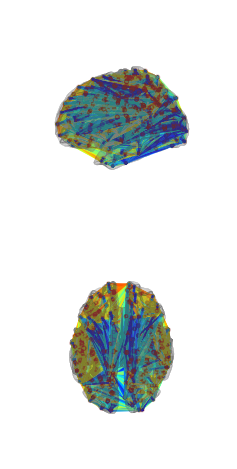

In [13]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thick_dict['HC'], currCoM, regNames, markerVecHC, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_HC', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU

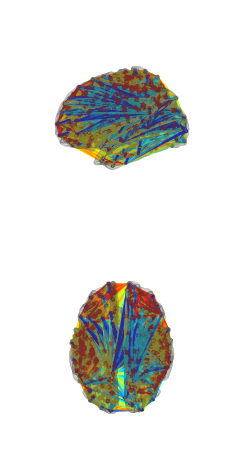

In [14]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thick_dict['TAU'], currCoM, regNames, markerVecTAU, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_TAU', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP

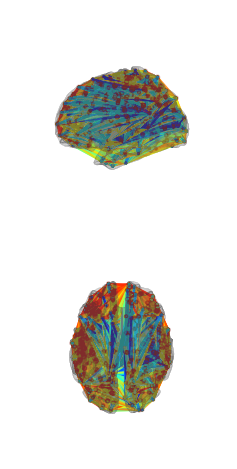

In [15]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thick_dict['TDP'], currCoM, regNames, markerVecTDP, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_TDP', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU > HC

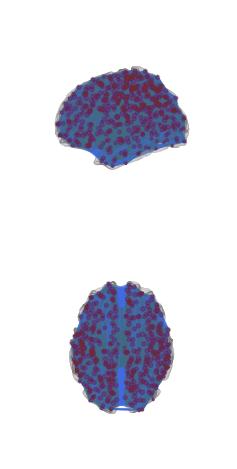

In [16]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thick_dict['TAU_gt_HC'], currCoM, regNames, markerVecTAU, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_(TAU_gt_HC)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP > HC

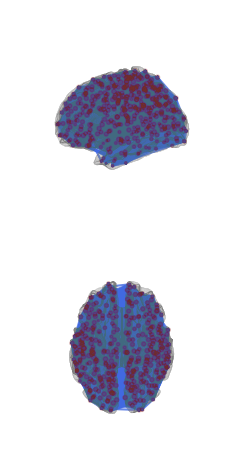

In [17]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thick_dict['TDP_gt_HC'], currCoM, regNames, markerVecTDP, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_(TDP_gt_HC)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU < HC

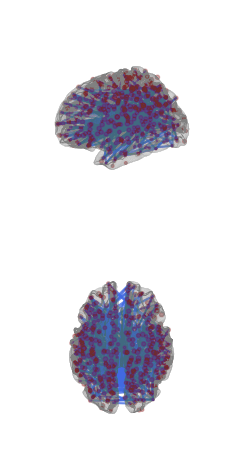

In [18]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thick_dict['TAU_lt_HC'], currCoM, regNames, markerVecTAU, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_(TAU_lt_HC)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP < HC

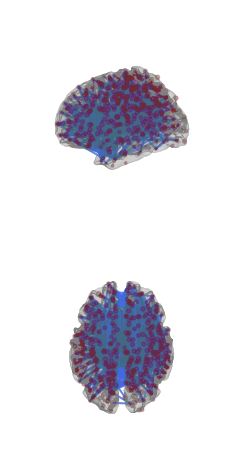

In [19]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thick_dict['TDP_lt_HC'], currCoM, regNames, markerVecTDP, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_(TDP_lt_HC)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU > TDP

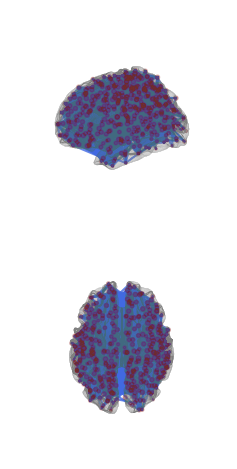

In [20]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thick_dict['TAU_gt_TDP'], currCoM, regNames, markerVecTAU, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_(TAU_gt_TDP)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP > TAU

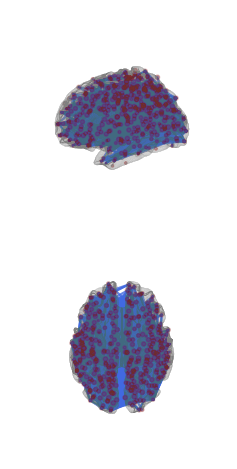

In [21]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thick_dict['TDP_gt_TAU'], currCoM, regNames, markerVecTDP, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_(TDP_gt_TAU)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## Thickness Value - Original - Fixed Density

### HC

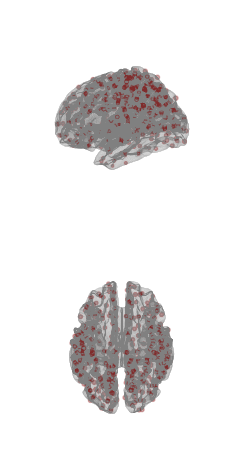

In [22]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thick_dict['HC'], fd_val), currCoM, regNames, 
                          markerVecHC, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_HC(FixedDensity_40)', covType='original', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU

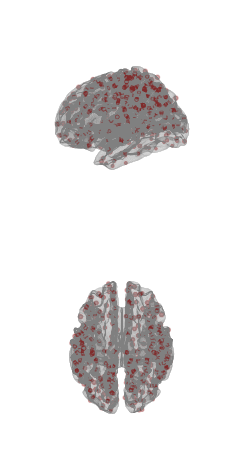

In [23]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thick_dict['TAU'], fd_val), currCoM, regNames, 
                          markerVecTAU, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_TAU(FixedDensity_40)', covType='original', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP

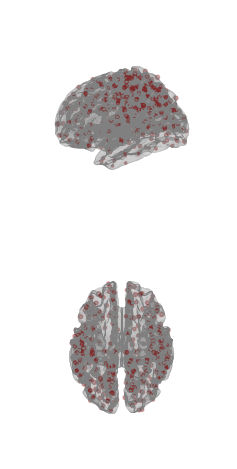

In [24]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thick_dict['TDP'], fd_val), currCoM, regNames, 
                          markerVecTDP, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_TDP(FixedDensity_40)', covType='original', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU > HC

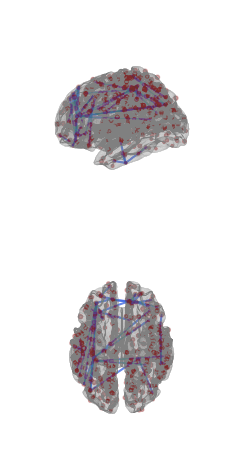

In [25]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thick_dict['TAU_gt_HC_raw'], fd_val), currCoM, regNames,
                          markerVecTAU, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_(TAU_gt_HC)(FixedDensity_40)', covType='sig', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP > HC

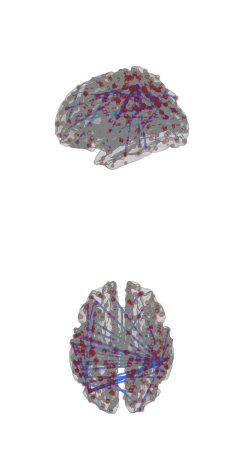

In [26]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thick_dict['TDP_gt_HC_raw'], fd_val), currCoM, regNames, 
                          markerVecTDP, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_(TDP_gt_HC)(FixedDensity_40)', covType='sig', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU < HC

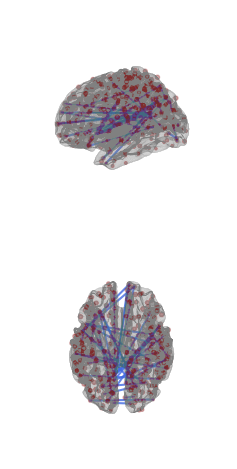

In [27]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thick_dict['TAU_lt_HC_raw'], fd_val), currCoM, regNames, 
                          markerVecTAU, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_(TAU_lt_HC)(FixedDensity_40)', covType='sig', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP < HC

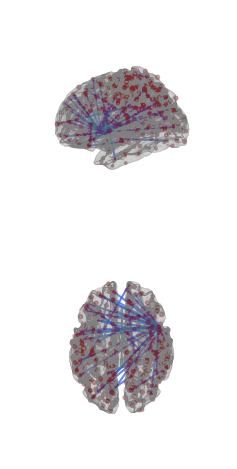

In [28]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thick_dict['TDP_lt_HC_raw'], fd_val), currCoM, regNames, 
                          markerVecTDP, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_(TDP_lt_HC)(FixedDensity_40)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU > TDP

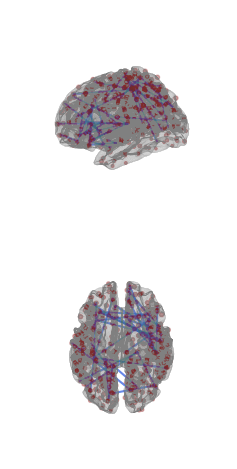

In [29]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thick_dict['TAU_gt_TDP_raw'], fd_val), currCoM, regNames, 
                          markerVecTAU, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_(TAU_gt_TDP)(FixedDensity_40)', covType='sig', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP > TAU

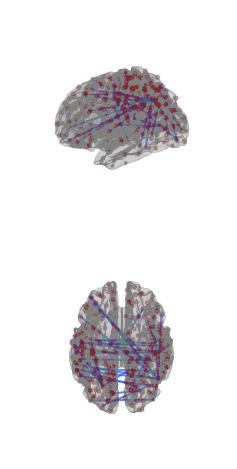

In [30]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thick_dict['TDP_gt_TAU_raw'], fd_val), currCoM, regNames, 
                          markerVecTDP, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_(TDP_gt_TAU)(FixedDensity_40)', covType='sig', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## Volume - W Score

### Define Vectors for Node Size and Node Color

In [31]:
# FOR NODE SIZE (Original Thickness Value)
vol_HC_exp = HC_w
vol_TAU_exp = TAU_w
vol_TDP_exp = TDP_w

# Get the MAX/MIN Thickness values
minVol_HC = np.nanmin(np.nanmean(vol_HC_exp, axis=0))
minVol_TAU = np.nanmin(np.nanmean(vol_TAU_exp, axis=0))
minVol_TDP = np.nanmin(np.nanmean(vol_TDP_exp, axis=0))

vanishing_val = 0.2
maxVol_HC = np.nanmax(np.nanmean(vol_HC_exp, axis=0) - minVol_HC) + vanishing_val
maxVol_TAU = np.nanmax(np.nanmean(vol_TAU_exp, axis=0) - minVol_TAU) + vanishing_val
maxVol_TDP = np.nanmax(np.nanmean(vol_TDP_exp, axis=0) - minVol_TDP) + vanishing_val

# NODE Size
markerVecVolHC = np.nanmean(vol_HC_exp, axis=0)
markerVecVolHC = 3 * (1 - ((markerVecVolHC - minVol_HC) / maxVol_HC))

markerVecVolTAU = np.nanmean(vol_TAU_exp, axis=0)
markerVecVolTAU = 3 * (1 - ((markerVecVolTAU - minVol_TAU) / maxVol_TAU))

markerVecVolTDP = np.nanmean(vol_TDP_exp, axis=0)
markerVecVolTDP = 3 * (1 - ((markerVecVolTDP - minVol_TDP) / maxVol_TDP))

# Set Node color --> Set as red (because cm.jet: 1 --> Red) Same for all HC/TAU/TDP
colorVec = np.ones(HC_w.shape[1])

### HC

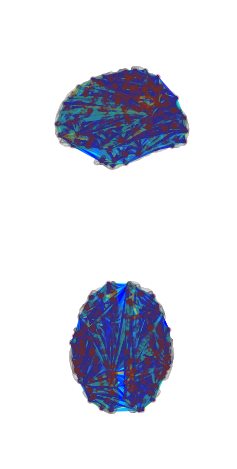

In [32]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_vol_w_dict['HC'], currCoM, regNames, markerVecVolHC, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_HC', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU

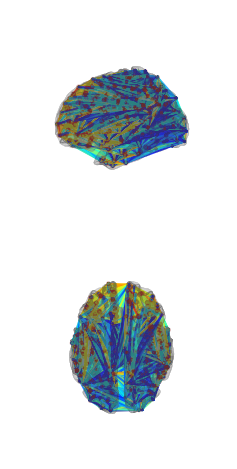

In [33]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_vol_w_dict['TAU'], currCoM, regNames, markerVecVolTAU, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_TAU', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP

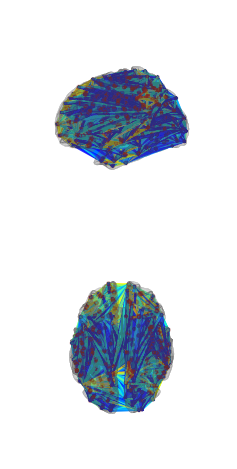

In [34]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_vol_w_dict['TDP'], currCoM, regNames, markerVecVolTDP, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_TDP', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU > HC

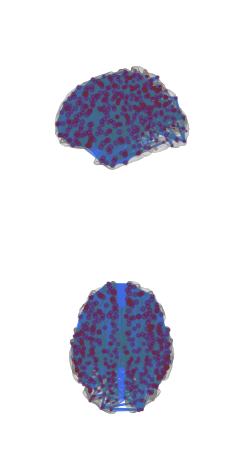

In [35]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_vol_w_dict['TAU_gt_HC'], currCoM, regNames, markerVecVolTAU, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_(TAU_gt_HC)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP > HC

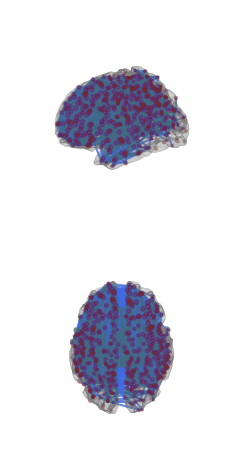

In [36]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_vol_w_dict['TDP_gt_HC'], currCoM, regNames, markerVecVolTDP, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_(TDP_gt_HC)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU < HC

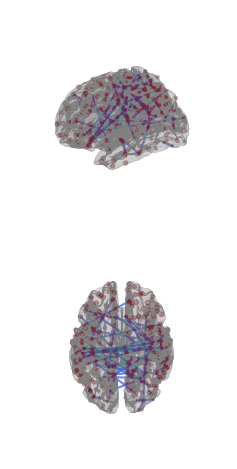

In [37]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_vol_w_dict['TAU_lt_HC'], currCoM, regNames, markerVecVolTAU, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_(TAU_lt_HC)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP < HC

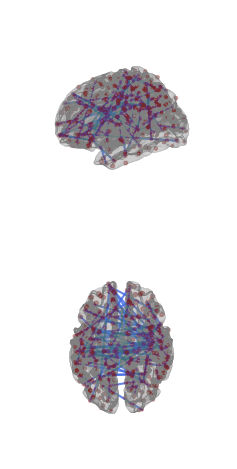

In [38]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_vol_w_dict['TDP_lt_HC'], currCoM, regNames, markerVecVolTDP, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_(TDP_lt_HC)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU > TDP

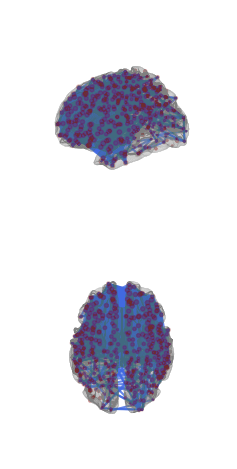

In [39]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_vol_w_dict['TAU_gt_TDP'], currCoM, regNames, markerVecVolTAU, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_(TAU_gt_TDP)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP > TAU

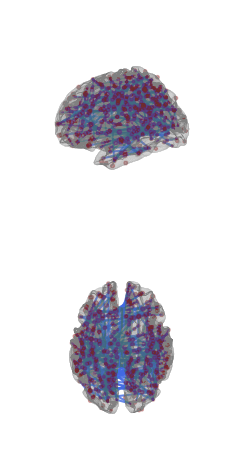

In [40]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_vol_w_dict['TDP_gt_TAU'], currCoM, regNames, markerVecVolTDP, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_(TDP_gt_TAU)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## Thickness - W Score - Fixed Density

### HC

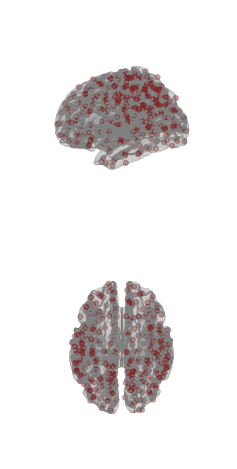

In [41]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_vol_w_dict['HC'], fd_val), currCoM, regNames, 
                          markerVecVolHC, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_HC(FixedDensity_40)', covType='original', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU

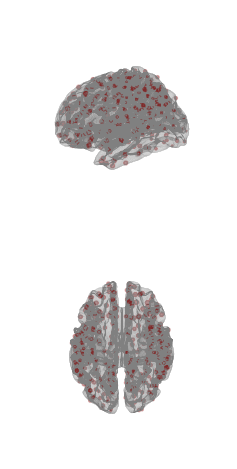

In [42]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_vol_w_dict['TAU'], fd_val), currCoM, regNames, 
                          markerVecVolTAU, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_TAU(FixedDensity_40)', covType='original', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP

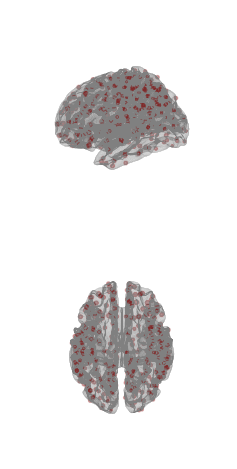

In [43]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_vol_w_dict['TDP'], fd_val), currCoM, regNames, 
                          markerVecVolTDP, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_TDP(FixedDensity_40)', covType='original', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU > HC

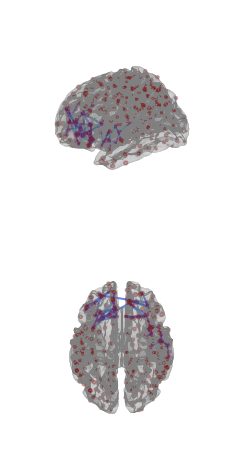

In [44]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_vol_w_dict['TAU_gt_HC_raw'], fd_val), currCoM, regNames, 
                          markerVecVolTAU, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_(TAU_gt_HC)(FixedDensity_40)', covType='sig', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP > HC

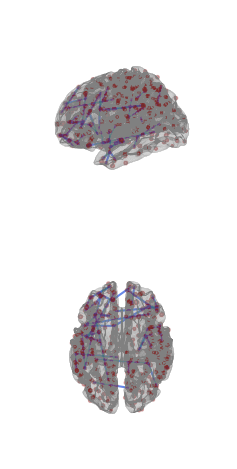

In [45]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_vol_w_dict['TDP_gt_HC_raw'], fd_val), currCoM, regNames, 
                          markerVecVolTDP, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_(TDP_gt_HC)(FixedDensity_40)', covType='sig', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU < HC

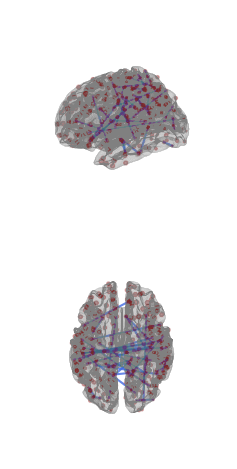

In [46]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_vol_w_dict['TAU_lt_HC_raw'], fd_val), currCoM, regNames, 
                          markerVecVolTAU, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_(TAU_lt_HC)(FixedDensity_40)', covType='sig', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP < HC

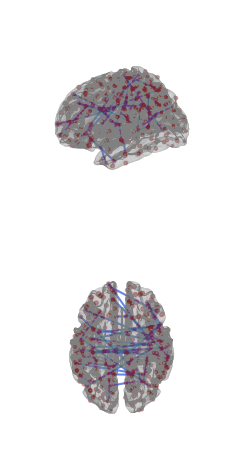

In [47]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_vol_w_dict['TDP_lt_HC_raw'], fd_val), currCoM, regNames, 
                          markerVecVolTDP, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_(TDP_lt_HC)(FixedDensity_40)', covType='sig', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU > TDP

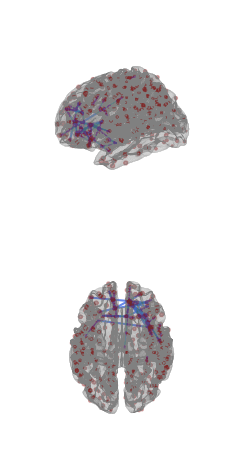

In [48]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_vol_w_dict['TAU_gt_TDP_raw'], fd_val), currCoM, regNames, 
                          markerVecVolTAU, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_(TAU_gt_TDP)(FixedDensity_40)', covType='sig', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP > TAU

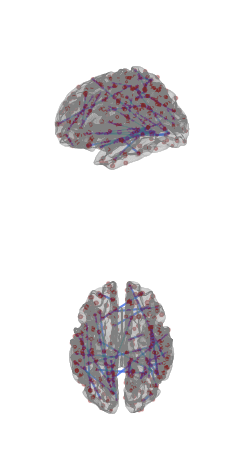

In [49]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_vol_w_dict['TDP_gt_TAU_raw'], fd_val), currCoM, regNames, 
                          markerVecVolTDP, colorVec, 
                          thick_Fig, '3D_Atlas_CovMat_vol_w_(TDP_gt_TAU)(FixedDensity_40)', covType='sig', 
                          nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)